In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools
from sklearn.dummy import DummyClassifier

In [37]:
#Data from https://www.kaggle.com/buntyshah/auto-insurance-claims-data
df = pd.read_csv('insurance_claims.csv')

# EDA

Let's take a look at the data. I'm going to get a quick peak at what the dataframe looks like, pull up columns and how many null cases there are, get descriptives, and run correlation tables. I'll also have to get dummy variables for my qualitative data.

In [38]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [41]:
#Converting fraud to 0 and 1 for correlation tables
df.fraud_reported.replace('Y', 1, inplace=True)
df.fraud_reported.replace('N', 0, inplace=True)

In [42]:
#collecting object columns minus date columns
cols = []
for x in df.select_dtypes('object'):
    if df[x].nunique() < 20:
        cols.append(x)
cols.append('auto_model')


In [43]:
#Looking at value counts to get a feel for class sizes
for c in cols:
    print(c)
    print(df[c].value_counts())

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_

In [44]:
#Converting object columns to dummy variables
df = pd.get_dummies(df, columns=cols)

In [45]:
#Create correlation table for months as customer
corr_df = df.corr().reset_index()
cus_df = corr_df[['index','months_as_customer']]
cus_df[abs(cus_df['months_as_customer']) > .05].sort_values(by='months_as_customer')

,index,months_as_customer
133,auto_model_Neon,-0.065765
26,insured_sex_FEMALE,-0.060925
66,incident_severity_Trivial Damage,-0.056849
112,auto_model_Accord,-0.053972
89,police_report_available_?,-0.051763
118,auto_model_E400,0.056693
2,policy_number,0.057555
12,witnesses,0.058383
32,insured_education_level_MD,0.059231
27,insured_sex_MALE,0.060925


In [46]:
#Create correlation table for fraud reported
fraud_df = corr_df[['index','fraud_reported']].reset_index()
fraud_df.columns = ['case', 'Column', 'Correlation']
fraud_df[abs(fraud_df['Correlation']) > .1].sort_values(by='Correlation')

,case,Column,Correlation
64,64,incident_severity_Minor Damage,-0.239716
65,65,incident_severity_Total Loss,-0.171247
59,59,collision_type_?,-0.169527
69,69,authorities_contacted_None,-0.132840
66,66,incident_severity_Trivial Damage,-0.131501
58,58,incident_type_Vehicle Theft,-0.120916
56,56,incident_type_Parked Car,-0.106564
15,15,property_claim,0.137835
13,13,total_claim_amount,0.163651
16,16,vehicle_claim,0.170049


So it looks like very little correlates with length of time as a customer. Age correlates but that makes sense since older people have more chances to stay with their car insurance carrier longer(someone who is 21 probably will not have car insurance for 10 years). The fraud correlation does reveal some interesting columns. Off the bat we see that there are some correlations such as not contacting authorities and collision type ? correlating with fraud(since incidents of fraud reported are mapped to 0). Higher claims and major damage seem to be correlated with not being fraudulent suggesting that these might draw greater scrutiny. I'll feed these into a model to see how predictive they are of fraud.

# Random Forest

I had some issues with my XGboost so I used a random forest classifier since they are both ensemble methods. The classifier will allow me to retain the original Y/N labels. I'll compare the random forest against a dummy classifier and show it's preformance on the confusion matrix. I also create dataframes that give a picture on how it predicts on each case and what the most important features in the model are.

In [47]:
#changing fraud back to object columns for classification
df.fraud_reported.replace(1, 'Y', inplace=True)
df.fraud_reported.replace(0, 'N', inplace=True)

In [48]:
#Create a test train split to evaluate models
X_cols = fraud_df[abs(fraud_df['Correlation']) > .1].sort_values(by='Correlation').Column.unique()
X = df[X_cols]
X.drop('fraud_reported', axis=1, inplace=True)
y = df.fraud_reported
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

/Users/nickthomas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
#Fit a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7771428571428571

In [50]:
#check against dummy classifer
dumb = DummyClassifier(strategy = "stratified", random_state=42)
dumb.fit(X_train, y_train)
print(dumb.score(X_test, y_test))

0.6285714285714286


We see the random forest outpreform the dummy classifier by 16 percentage points.

In [51]:
#Create a dataframe that shows how the model predicted against actual and the certainty behind each case
test_df = X_test
predict = rf.predict(X_test)
not_fraud = []
fraud = []
for x in rf.predict_proba(X_test):
    not_fraud.append(x[0])
    fraud.append(x[1])
test_df['fraud_reported_real'] = y_test
test_df['fraud_reported_predict'] = predict
test_df['not_fraud_certanity'] =  np.array(not_fraud)
test_df['fraud_certanity'] = np.array(fraud)

<ipython-input-51-decc8e91da8c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['fraud_reported_real'] = y_test
<ipython-input-51-decc8e91da8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['fraud_reported_predict'] = predict
<ipython-input-51-decc8e91da8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [52]:
#merge with original dataset for full picture
predicted_df = pd.merge(df, test_df[test_df.columns[-4:]], left_index=True, right_index=True)
predicted_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_hobbies,capital-gains,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_real,fraud_reported_predict,not_fraud_certanity,fraud_certanity
0,328,48,521585,2014-10-17,1000,1406.91,0,466132,sleeping,53300,...,0,0,0,0,0,0,Y,Y,0.23,0.77
2,134,29,687698,2000-09-06,2000,1413.14,5000000,430632,board-games,35100,...,0,0,0,0,0,0,N,N,0.95,0.05
3,256,41,227811,1990-05-25,2000,1415.74,6000000,608117,board-games,48900,...,0,1,0,0,0,0,Y,Y,0.07,0.93
5,256,39,104594,2006-10-12,1000,1351.10,0,478456,bungie-jumping,0,...,0,0,0,0,0,0,Y,Y,0.08,0.92
6,137,34,413978,2000-06-04,1000,1333.35,0,441716,board-games,0,...,0,0,0,0,0,0,N,N,0.93,0.07


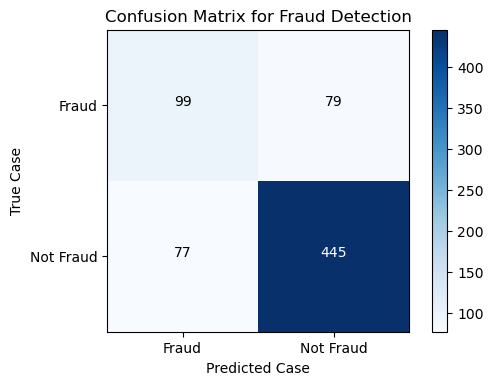

In [53]:
#Create confusion matrix
name = ['Y', 'N']
plt.figure(dpi=100)
cm = confusion_matrix(predicted_df.fraud_reported_real, predicted_df.fraud_reported_predict, labels=name)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0, 1], ['Fraud', 'Not Fraud'])
plt.yticks([0, 1], ['Fraud', 'Not Fraud'])
plt.ylabel("True Case")
plt.xlabel("Predicted Case")
plt.title('Confusion Matrix for Fraud Detection');
fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),#, fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [54]:
#Create dataframe of feature importance
feature_df = pd.DataFrame()
feature_df['Feature'] = X_test.columns[:-4]
feature_df['Feature_Importance'] = rf.feature_importances_
feature_df

,Feature,Feature_Importance
0,incident_severity_Minor Damage,0.044489
1,incident_severity_Total Loss,0.037338
2,collision_type_?,0.007509
3,authorities_contacted_None,0.003176
4,incident_severity_Trivial Damage,0.005313
5,incident_type_Vehicle Theft,0.002851
6,incident_type_Parked Car,0.002410
7,property_claim,0.245708
8,total_claim_amount,0.230551
9,vehicle_claim,0.239863


In [55]:
#Send the cases to an excel spreadsheet for stakeholders to evalutate preformance
predicted_df.to_excel('predicted_cases.xlsx')